In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [79]:
df = pd.read_csv("train.csv")
y = df.loan_defaulted
df = df.drop(columns = "loan_defaulted")
df.head()

,id,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,8949,708472008,44,F,3,Uneducated,Married,Less than $40K,Blue,36,...,3,3,6680.0,1839,4841.0,0.617,7632,95,0.532,0.275
1,6666,713927283,39,F,1,Graduate,Single,Unknown,Blue,34,...,1,1,2884.0,2517,367.0,0.693,4809,87,0.740,0.873
2,7120,715593783,52,M,1,Unknown,Married,$80K - $120K,Blue,36,...,2,2,14858.0,1594,13264.0,0.510,4286,72,0.636,0.107
3,2258,713237958,34,M,0,Graduate,Married,$40K - $60K,Blue,17,...,1,4,2638.0,2092,546.0,0.591,1868,43,0.344,0.793
4,3462,717569283,47,M,5,Doctorate,Single,Less than $40K,Blue,36,...,1,2,8896.0,1338,7558.0,0.741,4252,70,0.591,0.150


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7088 non-null   int64  
 1   CLIENTNUM                 7088 non-null   int64  
 2   Customer_Age              7088 non-null   int64  
 3   Gender                    7088 non-null   object 
 4   Dependent_count           7088 non-null   int64  
 5   Education_Level           7088 non-null   object 
 6   Marital_Status            7088 non-null   object 
 7   Income_Category           7088 non-null   object 
 8   Card_Category             7088 non-null   object 
 9   Months_on_book            7088 non-null   int64  
 10  Total_Relationship_Count  7088 non-null   int64  
 11  Months_Inactive_12_mon    7088 non-null   int64  
 12  Contacts_Count_12_mon     7088 non-null   int64  
 13  Credit_Limit              7088 non-null   float64
 14  Total_Re

In [57]:
y.value_counts()

loan_defaulted
0    5949
1    1139
Name: count, dtype: int64

In [59]:
df.isna().sum()

id                          0
CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [60]:
categorical_cols = df.select_dtypes(include="object")
category_values = {}
for col in (list(categorical_cols.columns)):
    values = list(categorical_cols[col].unique())
    category_values[col] = values
category_values


{'Gender': ['F', 'M'],
 'Education_Level': ['Uneducated',
  'Graduate',
  'Unknown',
  'Doctorate',
  'High School',
  'College',
  'Post-Graduate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['Less than $40K',
  'Unknown',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  '$60K - $80K'],
 'Card_Category': ['Blue', 'Silver', 'Gold', 'Platinum']}

# Categorical Analysis

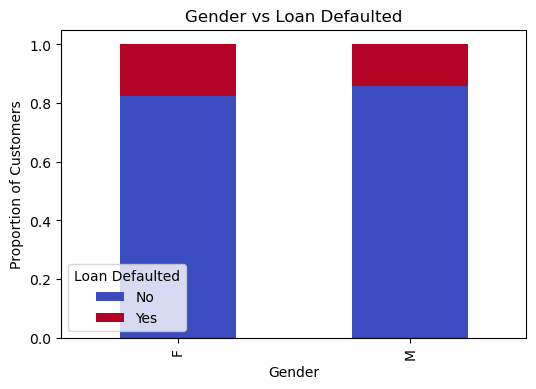

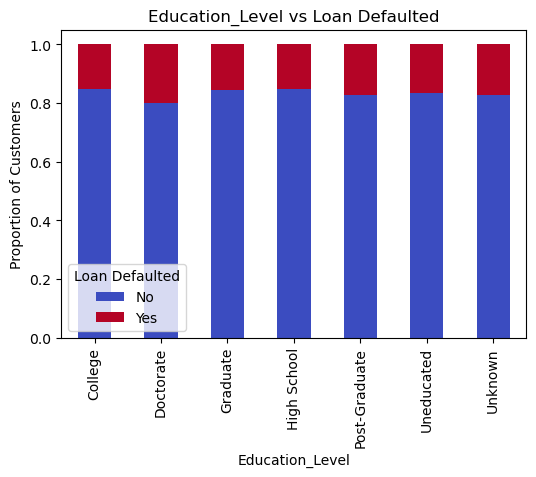

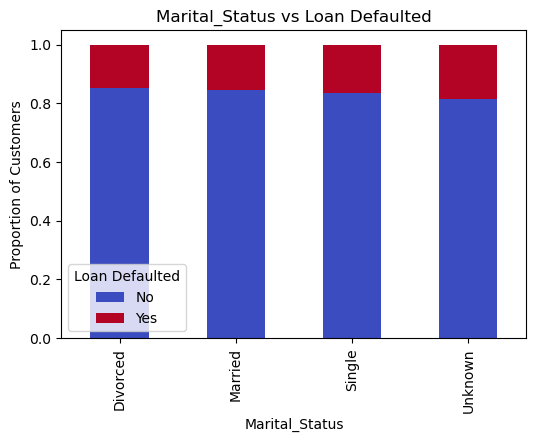

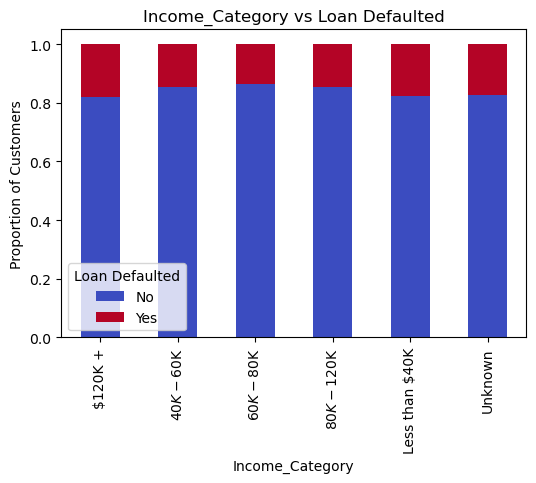

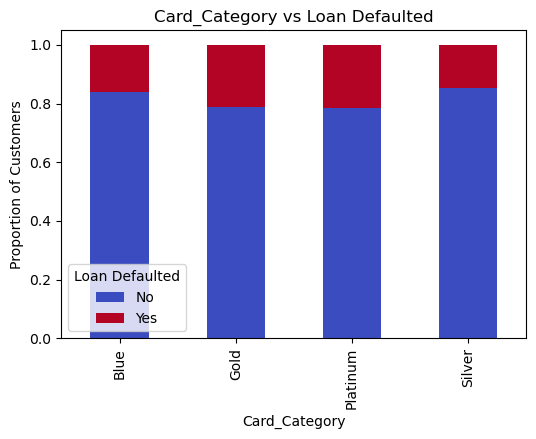

In [74]:
for col in categorical_cols.columns:
    ct = pd.crosstab(df[col], y, normalize = "index") 
    ct.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')

    plt.title(f'{col} vs Loan Defaulted')
    plt.xlabel(col)
    plt.ylabel('Proportion of Customers')
    plt.legend(title='Loan Defaulted', labels=['No', 'Yes'])
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
# Numerical Analysis

In [83]:
for col in categorical_cols.columns:
    print(f"\nDefault rate by {col}:")
    print(pd.crosstab(df[col], y, normalize='index') * 100)


Default rate by Gender:
loan_defaulted          0          1
Gender                              
F               82.388933  17.611067
M               85.671373  14.328627

Default rate by Education_Level:
loan_defaulted           0          1
Education_Level                      
College          84.927536  15.072464
Doctorate        79.872204  20.127796
Graduate         84.558484  15.441516
High School      84.879725  15.120275
Post-Graduate    82.608696  17.391304
Uneducated       83.381643  16.618357
Unknown          82.894737  17.105263

Default rate by Marital_Status:
loan_defaulted          0          1
Marital_Status                      
Divorced        85.356455  14.643545
Married         84.460080  15.539920
Single          83.514100  16.485900
Unknown         81.460674  18.539326

Default rate by Income_Category:
loan_defaulted           0          1
Income_Category                      
$120K +          82.046332  17.953668
$40K - $60K      85.441527  14.558473
$60K - $80

# Numerical Analysis

In [84]:
numerical_cols = df.select_dtypes(exclude="object")